# **Predicting house prices based on structured data and images**

# **1. Dataset description** 

Number of Attributes: 4 textual attributes in addition to the visual attributes that can be extracted from the images.

Attribute Information:
- Number of bedrooms
- Number of bathrooms
- Area (i.e., square footage)
- Zip code

For more info and credits visit:\
https://github.com/emanhamed/Houses-dataset

## Model architecture

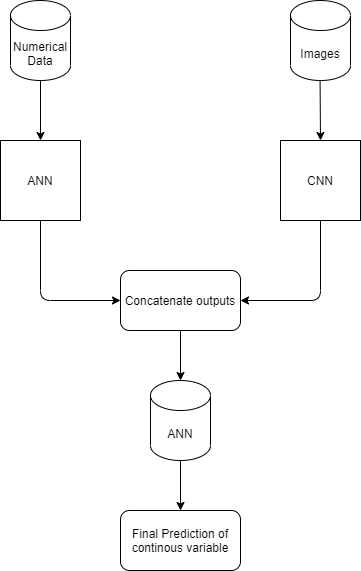

<a id="Libraries"></a> <br>
# **2. Libraries and data** 

In [ ]:
import warnings 
warnings.filterwarnings("ignore")
from collections import Counter 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Local data

In [ ]:
!gdown https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj
!unzip houses.zip

In [ ]:
filename= './data/HousesInfo.txt'
path = './data/' 

In [ ]:
header = ['bedrooms', 'bathrooms', 'area', 'zipcode', 'price']
df = pd.read_csv(filename, header=None, delimiter=' ', names=header)

<a id="Known"></a> <br>
# **3. First look at the data** 

In [ ]:
#Searching for null values,data types and shape
df.info()

In [ ]:
#Looking at unique values
df.nunique()

bedrooms       9
bathrooms     14
area         435
zipcode       49
price        369
dtype: int64

In [ ]:
#Looking at a data sample
df.head()

,bedrooms,bathrooms,area,zipcode,price
0,4,4.00,4053,85255,869500
1,4,3.00,3343,36372,865200
2,3,4.00,3923,85266,889000
3,5,5.00,4022,85262,910000
4,3,4.00,4116,85266,971226


In [ ]:
# visualizing target (prices) and identify outliers
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

In [ ]:
df = df[df['price']<1500000]

# **4. Feature Engineering** <a id="Feature Engineering"></a> <br>

## Null treatement

## Treatement of Categorical variables

## Looking at the correlation of the data

# **5. Train/Test split and Scaling** <a id="Train/Test split and Scaling"></a> <br>


## Import libraries

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

## Prepare and split Dataset into Train and Test

## Scale input for distance-based models

# **6. Implement baseline model** <a id="Implement model"></a> <br>

### Import libraries


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, BatchNormalization

### Define model evaluation function


In [ ]:
def model_eval(y_test,y_pred):
  print("Test mean           : {:.2f}".format(np.mean(y_test)))
  print("Price Std (baseline): {:.2f}".format(np.std(y_test)))
  print("Test RMSE           : {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
  print("Test MAE            : {:.2f}".format(mean_absolute_error(y_test,y_pred)))
  print("R² score            : {:.4f}".format(r2_score(y_test,y_pred)))

### Define, compile and train ANN model


### Predict and evaluate ANN model

In [ ]:
# Look at some examples in validation sample


In [ ]:
# visualizing residuals


# **7. Implement image model** <a id="Implement model"></a> <br>

### Import libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout, Flatten, Activation, Conv2D, BatchNormalization, MaxPooling2D

### Retreive image data

In [ ]:
#!gdown https://drive.google.com/uc?id=1tKjagJTuUBfZ1JORxnBK2Y4uiJaMXoPj
#!unzip houses.zip

In [ ]:
id = 45
types = ['frontal','kitchen','bedroom','bathroom']

f, ax = plt.subplots(1, 4, figsize=(20,20))
for pos, type in zip(range(0,4),types):
  ax[pos].imshow(io.imread('data/'+str(id)+'_'+type+'.jpg'))
plt.tight_layout()
plt.show()

### Process image data

In [ ]:
# For each property, concatenate the images from the four categories, based on the prices aligned with the structured data
# Images to be scaled to 50x50x3 (width, height, channels)

images = []
new_size = (100,100)
types = ['frontal','kitchen','bedroom','bathroom']
for i in df.index:
  for type in types:
    img = io.imread('data/'+str(i+1)+'_'+type+'.jpg')
    img = cv2.resize(img, new_size)
    if type=='frontal':
      image = img
    else:
      image =  np.concatenate((image, img), axis=1)  
  images.append(image)  

In [ ]:
# View the results
f, ax = plt.subplots(1, 3, figsize=(25,25))

for i in range(3): 
  ax[i].imshow(images[i])
  ax[i].set_title('house {}'.format(i))  
plt.tight_layout()
plt.show()

In [ ]:
# other concatenation options
images = []
new_size = (100,100)
types = ['frontal','kitchen','bedroom','bathroom']
for i in df.index:
  grid = np.zeros((200, 200, 3), dtype="uint8")
  for type in types:
    img = io.imread('data/'+str(i+1)+'_'+type+'.jpg')
    img = cv2.resize(img, new_size)
    if type=='frontal':
      grid[0:100, 0:100] = img
    if type=='kitchen':
      grid[0:100, 100:200] = img
    if type=='bedroom':
      grid[100:200, 100:200] = img
    if type=='bathroom':
      grid[100:200, 0:100] = img
  images.append(grid)  

### Train/test split image data

In [ ]:
# normalize inputs


In [ ]:
# normalize target


### Define, compile and train CNN model


### Predict and evaluate CNN model

In [ ]:
# Look at some examples in validation sample


In [ ]:
# visualizing residuals


# **8. Implement mixed model** <a id="Implement mixed model"></a> <br>

### Import libraries


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from keras.layers.merge import concatenate

### Define and re-train mixed model


In [ ]:
#%tensorflow_version 2.x
for l in num_model.layers:
  l.trainable = False
  #l.trainable = True

for l in img_model.layers:
  #l.trainable = True
  l.trainable = False

merged = concatenate([num_model.layers[-1].output, img_model.layers[-1].output])
dense = Dense(8, activation="relu")(merged)
output = Dense(1, activation="linear")(dense)

mixed_model = Model(inputs=[num_model.input, img_model.input], outputs=[output])
print (mixed_model.summary())

In [ ]:
mixed_checkpointer = ModelCheckpoint(filepath="mixed_weights.hdf5", verbose=1, save_best_only=True)

mixed_model.compile(loss='mse',
              optimizer= Adam(learning_rate=1e-2),
              metrics=['mae'])

In [ ]:
mixed_model.fit([X_train_scaled, X_train_image], y_train,
          batch_size = 8, epochs = 100, verbose=1,
          validation_data=([X_test_scaled, X_test_image], y_test),
          callbacks=[mixed_checkpointer])

### Predict and evaluate mixed model

In [ ]:
mixed_model.load_weights("mixed_weights.hdf5")
y_pred = mixed_model.predict([X_test_scaled, X_test_image])
y_pred_orig = y_pred * max_price
y_test_orig = y_test * max_price

model_eval(y_test_orig,y_pred_orig)

In [ ]:
# Look at some examples in validation sample
df_out = pd.DataFrame(y_test_orig)
df_out['final_pred'] = pd.DataFrame(y_pred_orig, index=df_out.index)
df_out.head(10)

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (df_out['price'] - df_out['final_pred'])
sns.displot(residuals)

In [ ]:
id = 475

print('Actual price:    ', df_out['price'].loc[id].round())
print('Predicted price: ', df_out['final_pred'].loc[id].round())
print('============================')

types = ['frontal','kitchen','bedroom','bathroom']
f, ax = plt.subplots(1, 4, figsize=(20,20))
for pos, type in zip(range(0,4),types):
  ax[pos].imshow(io.imread('data/'+str(id)+'_'+type+'.jpg'))
plt.tight_layout()
plt.show()